In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('/content/label_data.csv')
df

,title,stars,text,sentimen,sentimen_bert,sentimen_vader
0,Pantai Tanjung Gelam,5,pantai menakjubkan pasirpasir putih gakood,negative,negative,neutral
1,Pantai Tanjung Gelam,5,pantai tanjungak gakelam merupakan salah satu ...,positive,positive,neutral
2,Pantai Tanjung Gelam,5,salah satu pantai favorit bila karimunjawa ber...,positive,positive,neutral
3,Pantai Tanjung Gelam,5,pantai dengakanpasir putih bersih panorama lau...,positive,positive,neutral
4,Pantai Tanjung Gelam,5,the iconic tanjungak gakelam coconut trees,positive,positive,neutral
...,...,...,...,...,...,...
703,Pantai Legon Lele,4,stunningak,negative,negative,neutral
704,Pantai Legon Lele,5,nice place for sunrise and hangakout with friends,positive,positive,positive
705,Pantai Legon Lele,3,dependingak on when you come and wind directio...,positive,positive,negative
706,Pantai Legon Lele,5,destinasi sangakat bagakus pengakamatan sun ri...,positive,positive,neutral


In [4]:
sentimen_counts = df.sentimen.value_counts()
sentimen_counts

,count
sentimen,
positive,573
negative,82
neutral,53


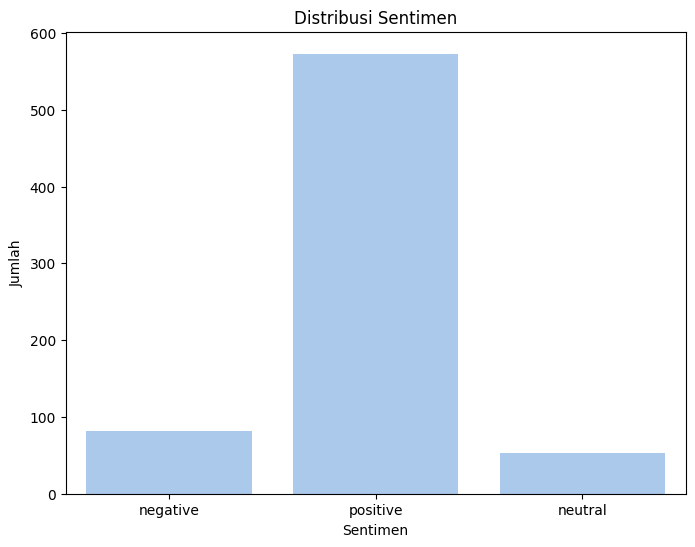

In [5]:
# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(8, 6))
sns.countplot(x='sentimen', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [6]:
data_negatif = df[df['sentimen'] == 'negative']
data_positif = df[df['sentimen'] == 'positive']
data_netral = df[df['sentimen'] == 'neutral']

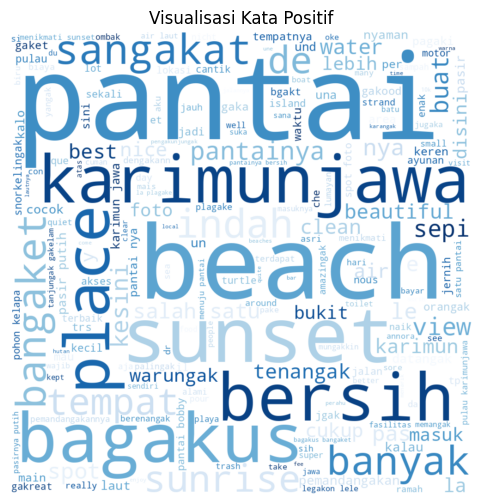

In [8]:
all_text_s1 = ' '.join(word for word in data_positif["text"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

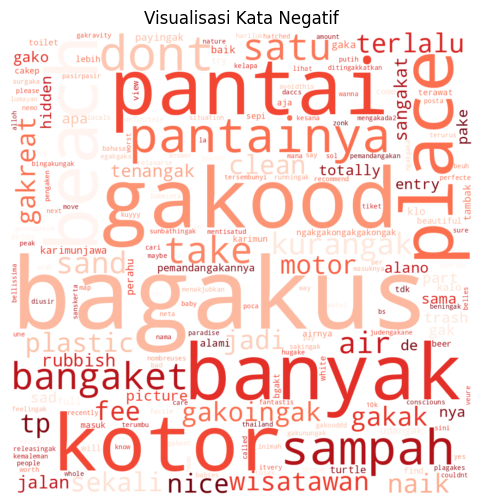

In [9]:
all_text_s0 = ' '.join(word for word in data_negatif["text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

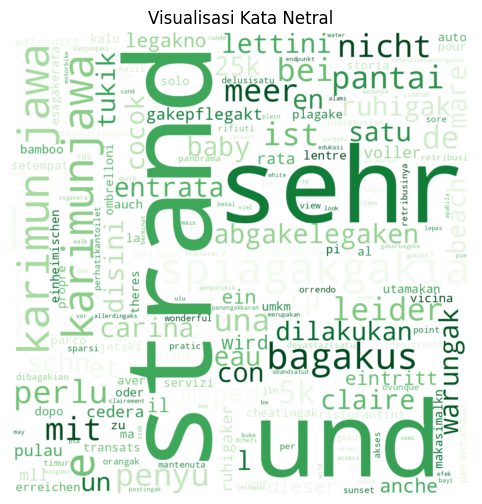

In [10]:
all_text_s2 = ' '.join(word for word in data_netral["text"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s2)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Netral")
plt.margins(x=0, y=0)
plt.show()

#Spliting Data

In [11]:
X=df.text
y=df.sentimen

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 566
Banyak data x_test  : 142
Banyak data y_train : 566
Banyak data y_test  : 142


#Training Data

In [15]:
# --- Buat Pipeline dengan SMOTE ---
model1 = ImbPipeline([
    ('vectorizer', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', MultinomialNB())
])

In [16]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

#Naive Bayes

In [17]:
model1.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('classifier', MultinomialNB())])

In [18]:
hasil1=model1.predict(x_test)

In [19]:
scores = cross_val_score(
    model1,
    X,
    y,
    cv=5,           # 5-fold cross validation
    scoring='accuracy'
)

print("Akurasi tiap fold:", scores)
print("Rata-rata akurasi:", scores.mean())

Akurasi tiap fold: [0.75352113 0.66901408 0.69014085 0.76595745 0.80851064]
Rata-rata akurasi: 0.7374288282888821


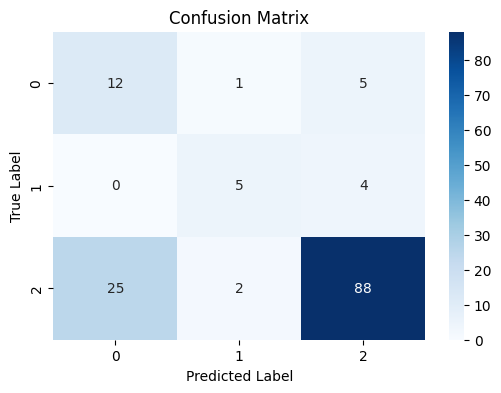

In [20]:
# Confusion matrix
cm1 = confusion_matrix(y_test, hasil1)

# Visualisasi confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
matrix = classification_report(y_test,hasil1)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    negative       0.32      0.67      0.44        18
     neutral       0.62      0.56      0.59         9
    positive       0.91      0.77      0.83       115

    accuracy                           0.74       142
   macro avg       0.62      0.66      0.62       142
weighted avg       0.82      0.74      0.76       142

